In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Paso 1: Cargar y Preparar los Datos
data = pd.read_csv('features_with_labels.csv')
X = data.drop('label', axis=1)
y = data['label']

# Paso 2: Dividir en Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Normalizar las Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Crear Modelos y Definir Parámetros
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# MLP
mlp_model = MLPClassifier(random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (500, 50), (1000, 25),(5000, 10)],
    'activation': ['relu', 'tanh', 'lbfgs'],
    'solver': ['lbfgs', 'adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Paso 5: Aplicar GridSearchCV
# Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# MLP
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

# Paso 6: Evaluar Modelos
# Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

# Decision Tree
dt_best_model = dt_grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

# MLP
mlp_best_model = mlp_grid_search.best_estimator_
mlp_predictions = mlp_best_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)
print(classification_report(y_test, mlp_predictions))


C:\Users\homer\anaconda3\envs\Audio-dataset\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\homer\anaconda3\envs\Audio-dataset\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\homer\anaconda3\envs\Audio-dataset\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\homer\anaconda3\envs\Audio-dataset\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    vali

Random Forest Accuracy: 0.902027027027027
              precision    recall  f1-score   support

    Adelante       0.87      0.86      0.87        72
       Atrás       0.88      0.92      0.90        64
     Derecha       0.89      0.95      0.92        75
   Izquierda       0.96      0.88      0.92        85

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

Decision Tree Accuracy: 0.6587837837837838
              precision    recall  f1-score   support

    Adelante       0.67      0.57      0.62        72
       Atrás       0.58      0.67      0.62        64
     Derecha       0.66      0.69      0.68        75
   Izquierda       0.72      0.69      0.71        85

    accuracy                           0.66       296
   macro avg       0.66      0.66      0.66       296
weighted avg       0.66      0.66      0.66       296

MLP Accuracy: 0.2905405405405405
            

Mejores parámetros del Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy : 0.90203 



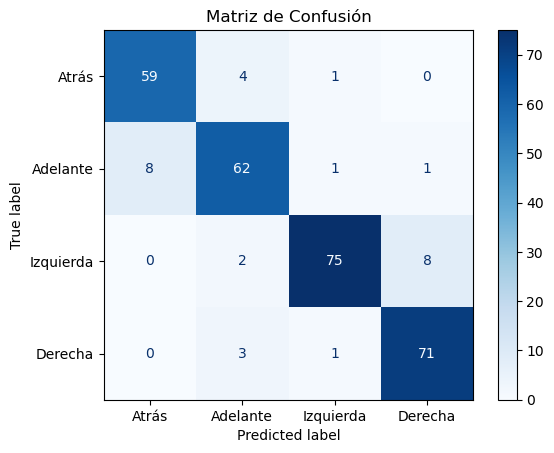

<Figure size 1600x900 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Final model
#rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
#rforest.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params_rf = rf_best_model.get_params()

print("Mejores parámetros del Random Forest:", best_params_rf)

# Guardar el modelo en un archivo
model_filename = 'best_model.pkl'
joblib.dump(rf_best_model, model_filename)

preds = rf_best_model.predict(X_test)

# Etiquetas de las clases en el orden correcto
class_labels = ['Atrás', 'Adelante', 'Izquierda', 'Derecha']

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds, labels=class_labels) #normalize = 'true'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')  # cmap es el mapa de colores, values_format='d' muestra números enteros

plt.title('Matriz de Confusión')
plt.figure(figsize=(16,9))
plt.rcParams['figure.dpi'] = 100
plt.show()

In [49]:
# import eli5
# from eli5.sklearn import PermutationImportance
#
# perm = PermutationImportance(estimator=rf_best_model, random_state=42)
# perm.fit(X_test, y_test)
#
# eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1542 ± 0.0565,mfcc4_var
0.0389 ± 0.0111,harmony_var
0.0278 ± 0.0232,mfcc12_mean
0.0208 ± 0.0124,mfcc9_var
0.0153 ± 0.0104,chroma_stft_var
0.0153 ± 0.0104,mfcc19_mean
0.0153 ± 0.0056,mfcc2_var
0.0153 ± 0.0322,mfcc19_var
0.0139 ± 0.0152,mfcc5_var
0.0125 ± 0.0104,mfcc20_var
